In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Wiki_IMF_GDP.csv')

In [3]:
def func(x, a, b):
    return a * x + b

How do countries from Europe & Central Asia compare to East Asia & the Pacific in the rate of growth in GDP?

In [4]:
df['Region'].unique()
EuCa = []
EaP = []
regions_interest =['Europe & Central Asia','East Asia & Pacific']
for region in regions_interest:
    dfd  = df[df['Region']==region]
    dfc = dfd[dfd.columns[2:12]]
    years=list(dfc)
    for year in years:
        year_avg = np.mean(dfc[year])
        if region == regions_interest[0]:
            EuCa.append(year_avg)
        else:
            EaP.append(year_avg)

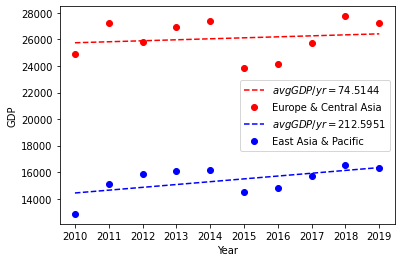

In [5]:
initialParameters = [1,1]
for dat,c,region in zip([EuCa,EaP],['red','blue'],regions_interest):
    fittedParameters, pcov = curve_fit(func, years, dat, initialParameters)
    a,b =  fittedParameters
    modelPredictions = [func(int(yr),a,b) for yr in years]
    plt.plot(years,modelPredictions,label =r'$avg GDP/yr = {0:.4f}$'.format(a),color=c,linestyle = '--')        
    plt.plot(years,dat,color=c,marker='o',label = region,linestyle='none')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

Choose one year, for any given country where a substantial change in GDP occurred. Describe what event was likely to be the most responsible for the change?

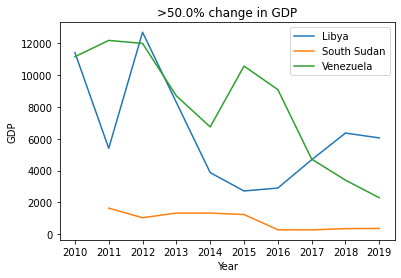

Largest GDP change in 1 year is 1.3497 by Libya


In [6]:
threshold = 0.5 # percent gdp change to look for
maximum = 0
for country in df['Country'].unique():
    dfa = df[df['Country']==country]
    dfa.drop(['Nº', 'Country','Region'], axis=1, inplace=True)
    gdpbyyear = list(dfa.iloc(0))[0]
    gdp_lastyr = gdpbyyear[0]
    largest_change = 0
    for gdp in gdpbyyear[1:]:
        percent_change = abs((gdp-gdp_lastyr)/gdp_lastyr)
        gdp_lastyr = gdp
        if(percent_change>largest_change):
            largest_change=percent_change
    if(largest_change >=threshold):
        plt.plot(years,gdpbyyear,label=country)
    if(largest_change> maximum):
        maximum= largest_change
        target_country = country
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('>{0}% change in GDP'.format(threshold*100))
plt.show()

print('Largest GDP change in 1 year is {0:.4f} by {1}'.format(maximum,target_country))